In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("./merged_df.csv")

In [3]:
df['Smartway_Binary'] = df['Smartway'].apply(lambda x: 1 if x.strip().lower() in ['yes', 'elite'] else 0)

In [ ]:
features = [
  'Engine_Displacement_L', 'Engine_Cylinders', 'Air_Pollution_Score',
  'City_Mpg', 'Hwy_Mpg', 'Combined_Mpg', 'Greenhouse_Gas_Score', 'Combined_Co2'
]

In [5]:
for col in ['Transmission_Type', 'Drive', 'Fuel', 'Cert_Region', 'Veh_Class']:
  df[col] = LabelEncoder().fit_transform(df[col])
  features.append(col)

In [6]:
# Split data
X = df[features]
y = df['Smartway_Binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [9]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [10]:
# Evaluate both models
lr_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_lr),
    "report": classification_report(y_test, y_pred_lr, output_dict=True),
    "confusion_matrix": confusion_matrix(y_test, y_pred_lr)
}

dt_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_dt),
    "report": classification_report(y_test, y_pred_dt, output_dict=True),
    "confusion_matrix": confusion_matrix(y_test, y_pred_dt)
}

lr_metrics, dt_metrics

({'accuracy': 0.955731861561458,
  'report': {'0': {'precision': 0.9713011981053218,
    'recall': 0.9749685358691093,
    'f1-score': 0.9731314118221788,
    'support': 7151.0},
   '1': {'precision': 0.8821593153390388,
    'recall': 0.8667529107373868,
    'f1-score': 0.8743882544861338,
    'support': 1546.0},
   'accuracy': 0.955731861561458,
   'macro avg': {'precision': 0.9267302567221802,
    'recall': 0.920860723303248,
    'f1-score': 0.9237598331541563,
    'support': 8697.0},
   'weighted avg': {'precision': 0.9554551189105794,
    'recall': 0.955731861561458,
    'f1-score': 0.9555785865673178,
    'support': 8697.0}},
  'confusion_matrix': array([[6972,  179],
         [ 206, 1340]])},
 {'accuracy': 0.9909164079567667,
  'report': {'0': {'precision': 0.9933035714285714,
    'recall': 0.9956649419661586,
    'f1-score': 0.9944828549479712,
    'support': 7151.0},
   '1': {'precision': 0.9797253106605625,
    'recall': 0.9689521345407504,
    'f1-score': 0.974308943089431,
 

📊 Smartway Prediction Model Comparison:



,Accuracy,Precision (0),Recall (0),F1 Score (0),Precision (1),Recall (1),F1 Score (1)
Logistic Regression,95.57,97.13,97.50,97.31,88.22,86.68,87.44
Decision Tree,99.09,99.33,99.57,99.45,97.97,96.90,97.43


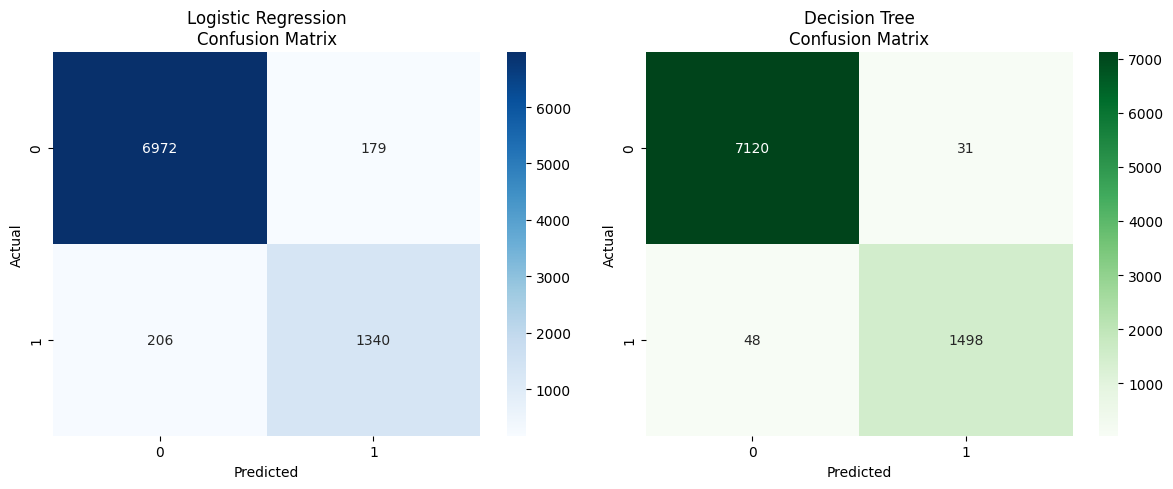

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

def display_model_comparison(lr_metrics, dt_metrics):
    # Extract values
    def extract_metrics(report):
        return {
            "Accuracy": round(report["accuracy"] * 100, 2),
            "Precision (0)": round(report["0"]["precision"] * 100, 2),
            "Recall (0)": round(report["0"]["recall"] * 100, 2),
            "F1 Score (0)": round(report["0"]["f1-score"] * 100, 2),
            "Precision (1)": round(report["1"]["precision"] * 100, 2),
            "Recall (1)": round(report["1"]["recall"] * 100, 2),
            "F1 Score (1)": round(report["1"]["f1-score"] * 100, 2),
        }

    lr_stats = extract_metrics(lr_metrics["report"])
    dt_stats = extract_metrics(dt_metrics["report"])

    df_comparison = pd.DataFrame([lr_stats, dt_stats], index=["Logistic Regression", "Decision Tree"])
    print("📊 Smartway Prediction Model Comparison:\n")
    display(df_comparison)

    # Confusion Matrices
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(lr_metrics["confusion_matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title("Logistic Regression\nConfusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    sns.heatmap(dt_metrics["confusion_matrix"], annot=True, fmt="d", cmap="Greens", ax=axes[1])
    axes[1].set_title("Decision Tree\nConfusion Matrix")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()
    
display_model_comparison(lr_metrics, dt_metrics)

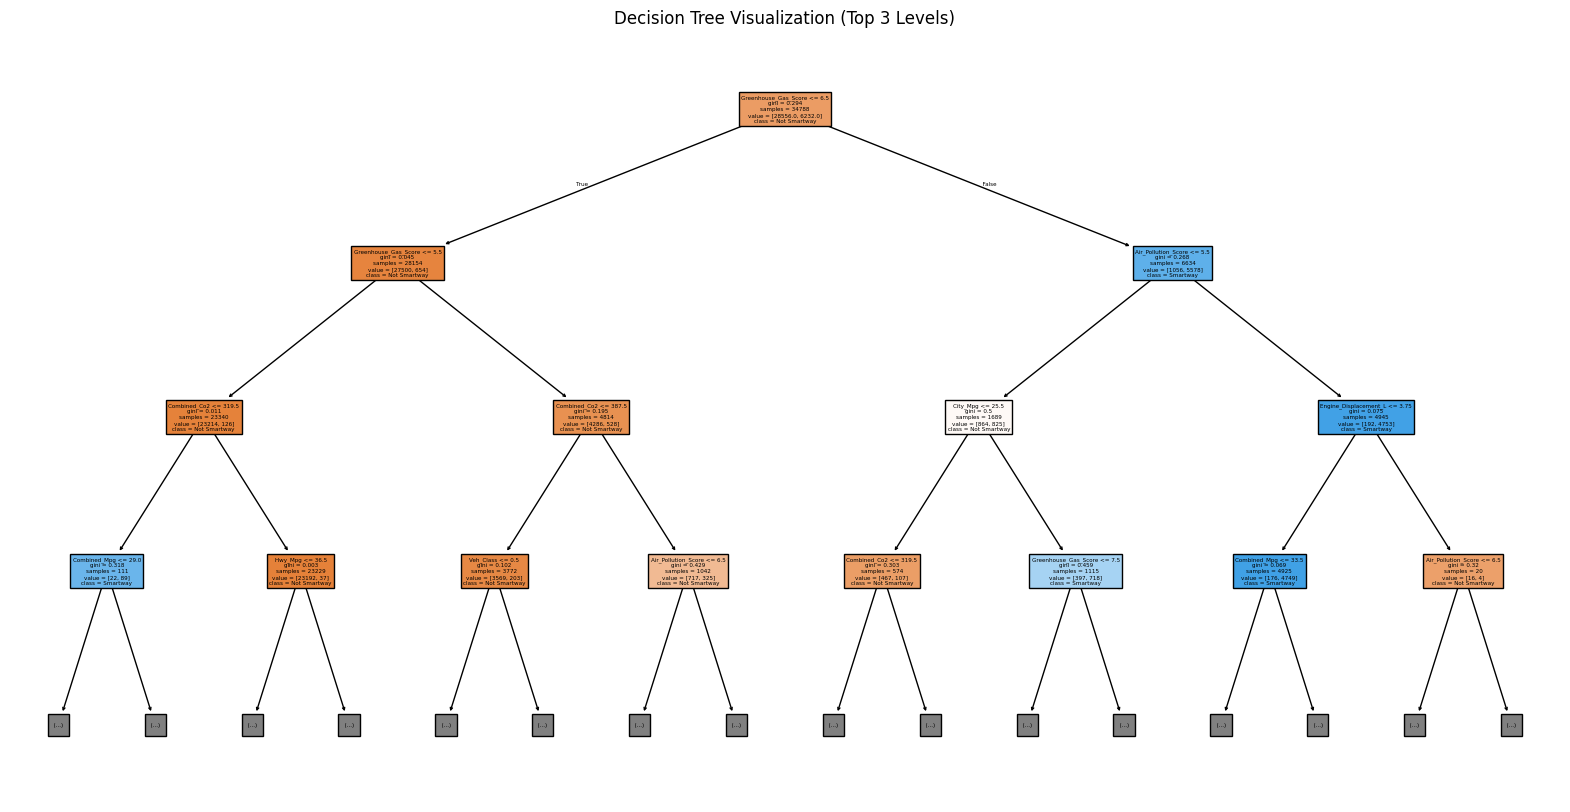

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the trained Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["Not Smartway", "Smartway"], filled=True, max_depth=3)
plt.title("Decision Tree Visualization (Top 3 Levels)")
plt.show()


Save Decision Tree

In [13]:
import joblib

model_path = './model/smartway_decision_tree_model.pkl'
joblib.dump(dt, model_path)

['./model/smartway_decision_tree_model.pkl']